# Optimal Parameter Search

In [1]:
import numpy as np
import scipy as sp
from libsvmdata import fetch_libsvm

from src.experiment.parameter_search import parameter_search

In [2]:
datasets = ["a7a", "a9a", "w7a", "w8a", "phishing"]
# max number of iterations for finding saddle with extragradient
num_iter_solution = 500000

# max time for finding saddle with extragradient
max_time_solution = 3600
# tolerance of solution obtained with extragradient
tolerance_solution = 1e-10
# required accuracy of sliding
eps = 1e-10
seed = 30

In [3]:
# number of nodes
num_nodes = 25

regcoef_x = 2.0
regcoef_y = 2.0
r_x = 5.0
r_y = 0.0
comm_budget_experiment = 5000

In [7]:
methods = ["vi_adom"]  # ["extragrad_con", "sliding", "extragrad", "vi_adom"]
topologies = ["star"]  # ["grid", "ring", "star"]
labels = ["Alg.2"]  # ['EGD-CON', 'Sliding', 'EGD-GT', 'Alg.2']

In [8]:
from typing import Tuple

def get_A_b(data: str) -> Tuple[np.ndarray, np.ndarray]:
    A, b = fetch_libsvm(data)
    if sp.sparse.issparse(A):
        A = A.toarray()
    
    return A, b

Method: Alg.2





Stepsize factors...:   0%|                                                                                                                                                                   | 0/2 [00:00<?, ?it/s]

Stepsize factor: 0.007
Running src VI ADOM with stepsize_factor: 0.007...





Stepsize factors...:  50%|█████████████████████████████████████████████████████████████████████████████                                                                             | 1/2 [04:13<04:13, 253.61s/it]

argument_primal_distance_to_consensus, argument_primal_distance_to_opt, gradient_primal_distance_to_opt can be accessed at corresponding logger class fields.
Stepsize factor: 0.009
Running src VI ADOM with stepsize_factor: 0.009...





Stepsize factors...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [08:04<00:00, 242.35s/it]

argument_primal_distance_to_consensus, argument_primal_distance_to_opt, gradient_primal_distance_to_opt can be accessed at corresponding logger class fields.


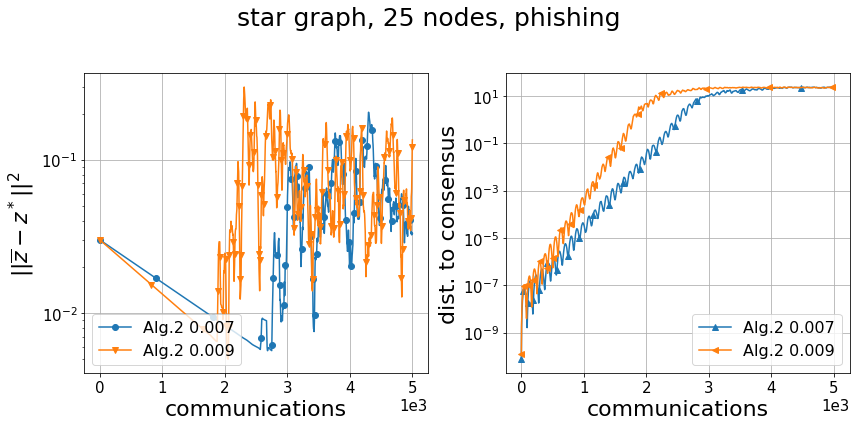



Methods...: 1it [08:06, 486.20s/it]

Datasets...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [4:28:33<00:00, 3222.77s/it]


In [9]:
parameter_search(
    methods=methods,
    topologies=topologies,
    datasets=datasets,
    num_nodes=num_nodes,
    num_states=comm_budget_experiment,
    labels=labels,
    regcoef_x=regcoef_x,
    regcoef_y=regcoef_y,
    r_x=r_x,
    r_y=r_y,
    eps=eps,
    num_iter_solution=num_iter_solution,
    max_time_solution=max_time_solution,
    tolerance_solution=tolerance_solution,
    comm_budget_experiment=comm_budget_experiment,
    experiment_type="real",
    stepsize_factors=[0.007, 0.009],  # [0.1, 0.01, 0.001, 0.25],
    get_A_b=get_A_b,
)